# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Import Dataset i.e. advertising.csv file

In [ ]:
data = pd.read_csv("advertising.csv")
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


### Data Profiling

In [ ]:
# Getting Information anout dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
# Checking for Null values
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
# Checking for Correlation
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<AxesSubplot:>

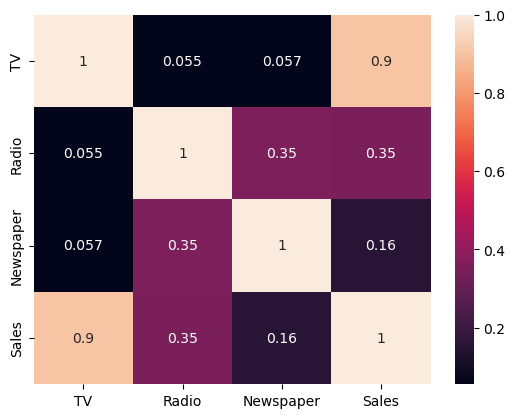

In [ ]:
# draw a Plot to see the correlation b/w the variables or features using heatmap
sns.heatmap(data.corr(),annot=True)

In [ ]:
# Describing about dataset
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


### Checking for outliers

F:\Notes\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TV'>

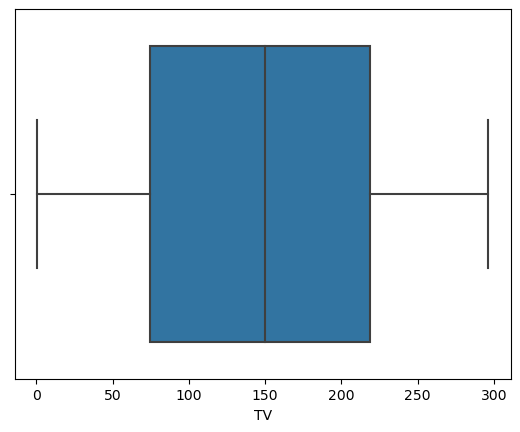

In [ ]:
sns.boxplot(data["TV"])

F:\Notes\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Radio'>

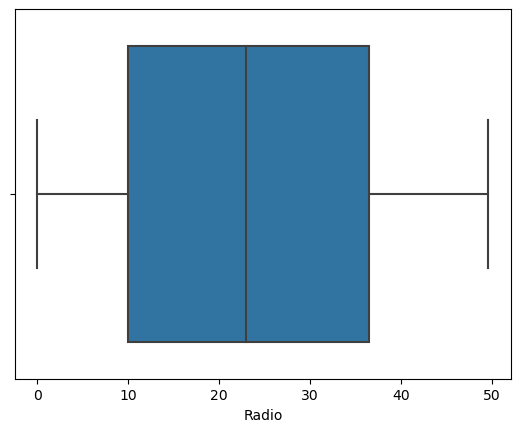

In [ ]:
sns.boxplot(data["Radio"])

F:\Notes\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Newspaper'>

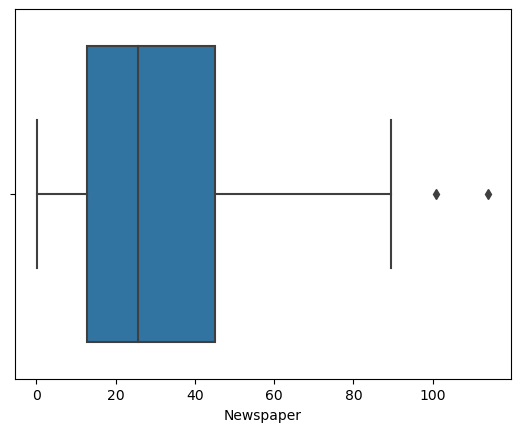

In [ ]:
sns.boxplot(data["Newspaper"])

F:\Notes\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales'>

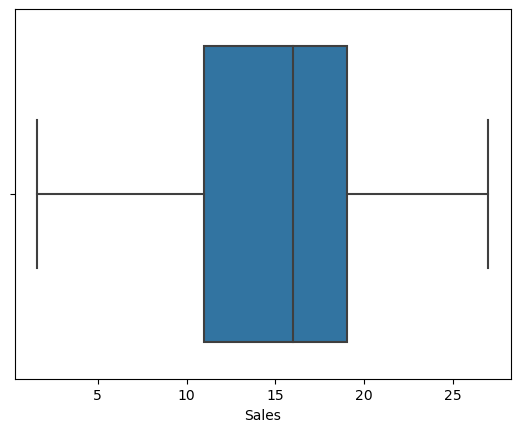

In [ ]:
sns.boxplot(data["Sales"])

### As all the columns are numerical so no need of using "Encoding Techniques"

In [ ]:
# Spliting the data into two parts using x and y variables
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [ ]:
# Split X and Y into Train_Test_Split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=60)

In [ ]:
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(160, 3) (40, 3) (160,) (40,)


In [ ]:
# Model Training using xtrain and ytrain by using Linaer Regression
from sklearn.linear_model import LinearRegression
LE  = LinearRegression()
LE.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
# Model Prediction using xtest
ypred = LE.predict(xtest)
print(ypred)

[14.86253567 20.71209333 11.50411103 21.30153573 21.24006953 20.9128905
 19.29855108 18.05566817 15.12820499  8.267163   11.27264507  7.35008557
 17.51542401  6.20767918 11.35760162 18.24877288 18.08778935 10.66059873
  8.13809106 11.88656912 24.50971973  8.46190316 14.79396758 17.13071653
 12.11917011 19.44224732 13.78999297 10.25602094  7.60305103  8.35786633
 13.93232255 19.25624785 15.61360351 20.16153728 21.01431065 17.89957036
 14.32171256  8.06280812 13.89103958 10.38308253]


In [ ]:
ytest[:10]

87     16.0
52     22.6
144    12.3
176    20.2
33     17.4
0      22.1
53     21.2
81     17.3
120    15.5
132     5.7
Name: Sales, dtype: float64

In [ ]:
# Checking Score of the model
LE.score(xtest,ytest)

0.9331088069223819

### Not Required Standardization

In [ ]:
# Standardising
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain_sc = sc.fit_transform(xtrain)
xtest_sc = sc.transform(xtest)

In [ ]:
# retraining the model
# Model Training using xtrain and ytrain by using Linaer Regression
from sklearn.linear_model import LinearRegression
LE  = LinearRegression()
LE.fit(xtrain_sc,ytrain)

LinearRegression()

In [ ]:
y_pred = LE.predict(xtest_sc)
print(y_pred)

[14.86253567 20.71209333 11.50411103 21.30153573 21.24006953 20.9128905
 19.29855108 18.05566817 15.12820499  8.267163   11.27264507  7.35008557
 17.51542401  6.20767918 11.35760162 18.24877288 18.08778935 10.66059873
  8.13809106 11.88656912 24.50971973  8.46190316 14.79396758 17.13071653
 12.11917011 19.44224732 13.78999297 10.25602094  7.60305103  8.35786633
 13.93232255 19.25624785 15.61360351 20.16153728 21.01431065 17.89957036
 14.32171256  8.06280812 13.89103958 10.38308253]


In [ ]:
ytest[:10]

87     16.0
52     22.6
144    12.3
176    20.2
33     17.4
0      22.1
53     21.2
81     17.3
120    15.5
132     5.7
Name: Sales, dtype: float64

In [ ]:
LE.score(xtest_sc,ytest)

0.9331088069223819